## Neural Networks of Boolean Functions

## Simple Perceptron without weight and bias updation

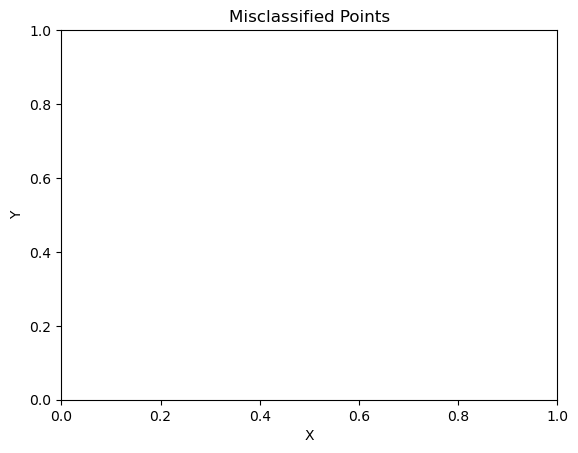

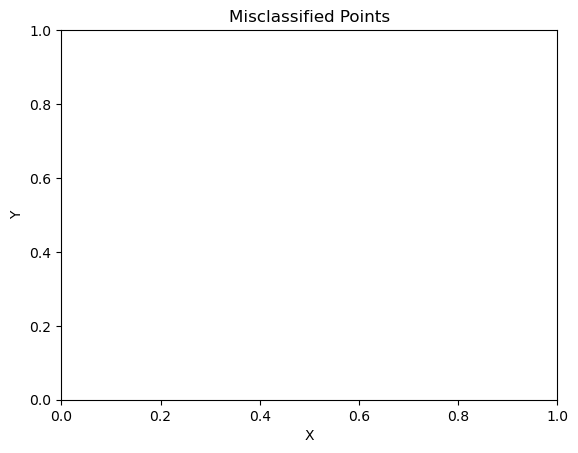

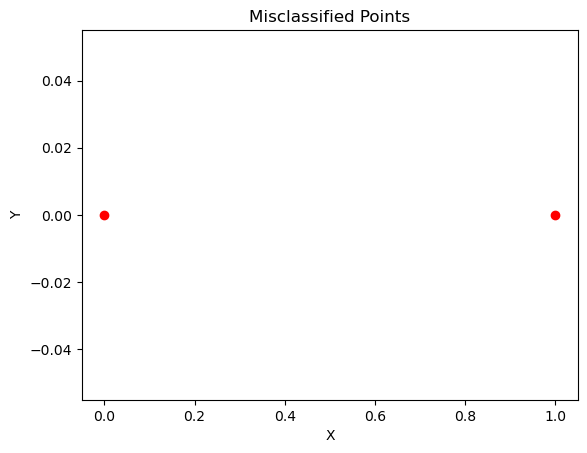

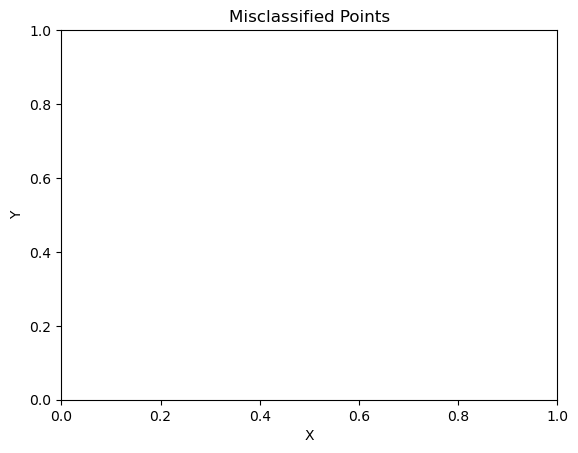

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Simple_Neuron:
    def __init__(self, input_size, learning_rate=0.01):
        # Assigning arbitrary values to weights and bias
        self.weights = np.array([0.5] * (input_size + 1))
        self.learning_rate = learning_rate
        self.errors = []

    def linear_function(self, inputs):
        Z = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return Z

    def activation_function(self, input):
        return np.where(input >= 0, 1, 0)

    def prediction_function(self, inputs):
        Z = self.linear_function(inputs)
        return self.activation_function(Z)

    def training_function(self, inputs, target):
        prediction = self.prediction_function(inputs)
        error = target - prediction
        self.errors.append(error)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error

    def fit_model(self, X, Y, epochs):
        for _ in range(epochs):
            for inputs, target in zip(X, Y):
                self.training_function(inputs, target)

    def plot_misclassifications(self, X, Y):
        misclassified_points = []
        for inputs, target in zip(X, Y):
            prediction = self.prediction_function(inputs)
            if prediction != target:
                misclassified_points.append(inputs)

        if len(misclassified_points) > 0:
            misclassified_points = np.array(misclassified_points)
            plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], marker='o', color='red', label='Misclassified')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Misclassified Points')
        plt.show()

# Boolean Functions
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_and = np.array([0, 0, 0, 1])

X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_or = np.array([0, 1, 1, 1])

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_nand = np.array([1, 1, 1, 0])

# AND Function
and_perceptron = Simple_Neuron(input_size=X_and.shape[1], learning_rate=0.8)
and_perceptron.fit_model(X_and, Y_and, epochs=1000)
and_perceptron.plot_misclassifications(X_and, Y_and)

# OR Function
or_perceptron = Simple_Neuron(input_size=X_or.shape[1], learning_rate=0.8)
or_perceptron.fit_model(X_or, Y_or, epochs=1000)
or_perceptron.plot_misclassifications(X_or, Y_or)

# XOR Function
xor_perceptron = Simple_Neuron(input_size=X_xor.shape[1], learning_rate=0.8)
xor_perceptron.fit_model(X_xor, Y_xor, epochs=1000)
xor_perceptron.plot_misclassifications(X_xor, Y_xor)

# NAND Function
nand_perceptron = Simple_Neuron(input_size=X_nand.shape[1], learning_rate=0.8)
nand_perceptron.fit_model(X_nand, Y_nand, epochs=1000)
nand_perceptron.plot_misclassifications(X_nand, Y_nand)


###  Creating a Perceptron along with Perceptron Learning Algorithm

In [85]:
import numpy as np

class Learning_Perceptron:
    def __init__(self,input_size,learning_rate=0.01):
        self.weights = np.random.random(input_size + 1)
        self.learning_rate = learning_rate
        self.errors = []

    # Linear Function to calculate the product of the inputs and weights and adding the bias term
    def linear_function(self,inputs):
        Z = np.dot(inputs,self.weights[1:]) + self.weights[0] # bias term
        return Z

    # Activation Function
    def activation_function(self,input):
        return np.where(input>=0,1,0)

    # Prediction Function for predicting the output values
    def prediction_function(self,inputs):
        Z = self.linear_function(inputs)
        return self.activation_function(Z)
    
    
    # Training Function to train the perceptron model
    def training_function(self,inputs,target):
        prediction = self.prediction_function(inputs) # predicting the values
        error = target - prediction # calculating the loss
        self.errors.append(error)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error
        

    def loss_function(self,prediciton,target):
       loss = (prediciton - target) ** 2
       return loss

    # Model fitting to train the model multiple times and improve its performance and accuracy
    def fit_model(self,X,Y,epochs):
        for _ in range(epochs):
            for inputs,target in zip(X,Y):
                self.training_function(inputs,target)
                        

### Inputs for the Perceptron

### AND Boolean Function

In [98]:

# AND Boolean Function
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
res = np.array([0,0,0,1])
and_perceptron = Learning_Perceptron(input_size=X_and.shape[1], learning_rate=0.8)
# Fit the model
and_perceptron.fit_model(X_and,res,epochs=1000)
# Make predictions
predictions = and_perceptron.prediction_function(X_and)
# Accuraccy
and_preceptron_accuracy = np.mean(predictions == res) * 100
# Error Rate
error_rate = np.sum(and_perceptron.errors)
print("Error Rate = ", error_rate)
print("Accuracy of AND Boolean Function: ", and_preceptron_accuracy)

Error Rate =  -1
Accuracy of AND Boolean Function:  100.0


### OR Boolean Function

In [100]:
# OR Boolean Function
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
res = np.array([0,0,1,1])
or_perceptron = Learning_Perceptron(input_size=X_or.shape[1], learning_rate=0.9)
# Fit the model
or_perceptron.fit_model(X_or,res,epochs=1000)
# Make predictions
predictions = or_perceptron.prediction_function(X_or)
# Accuraccy
or_preceptron_accuracy = np.mean(predictions == res) * 100
# Error Rate
error_rate = np.sum(or_perceptron.errors)
print("Error Rate = ", error_rate)
print("Accuracy of OR Boolean Function: ", or_preceptron_accuracy)

Error Rate =  -1
Accuracy of OR Boolean Function:  100.0


### NAND Boolean Function

In [101]:
# NAND Boolean Function
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
res = np.array([1,1,0,0])
nand_perceptron = Learning_Perceptron(input_size=X_nand.shape[1], learning_rate=0.8)
# Fit the model
nand_perceptron.fit_model(X_nand,res,epochs=1000)
# Make predictions
predictions = nand_perceptron.prediction_function(X_nand)
# Accuraccy
nand_preceptron_accuracy = np.mean(predictions == res) * 100
# Error Rate
error_rate = np.sum(nand_perceptron.errors)
print("Error Rate = ", error_rate)
print("Accuracy of NAND Boolean Function: ", nand_preceptron_accuracy)

Error Rate =  -1
Accuracy of NAND Boolean Function:  100.0


### XOR Boolean Function

In [89]:
# XOR Boolean Function
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
res = np.array([0,1,1,0])
xor_perceptron = Learning_Perceptron(input_size=X_xor.shape[1], learning_rate=0.1)
# Fit the model
xor_perceptron.fit_model(X_xor,res,epochs=1000)
# Make predictions
predictions = xor_perceptron.prediction_function(X_xor)
# Accuraccy
xor_preceptron_accuracy = np.mean(predictions == res) * 100
# Error Rate
error_rate = np.sum(xor_perceptron.errors)
print("Error Rate = ", error_rate)
print("Accuracy of XOR Boolean Function: ", xor_preceptron_accuracy)

Error Rate =  -1
Accuracy of XOR Boolean Function:  50.0


## Gradient Descent Algorithm for functions

### Function 1 - f(x) = x^2 - 2x + 2

The algorithm converged to the minimum point x = 0.9999954328073833 in 53 iterations.


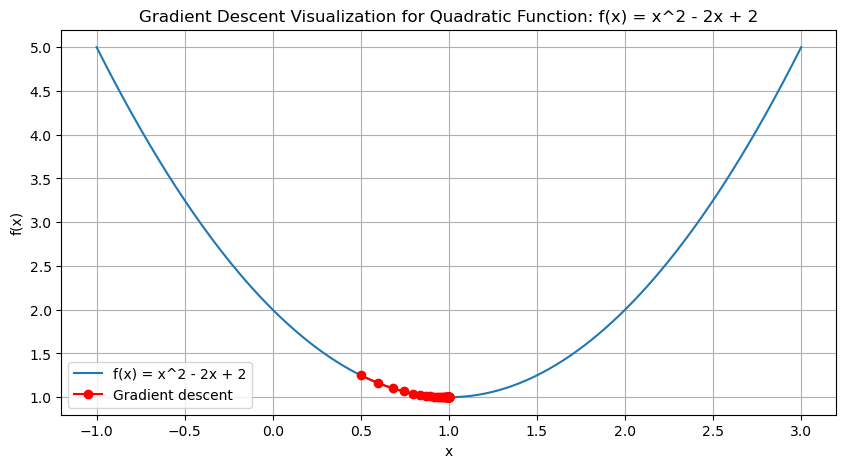

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the function
def quadratic_function(x):
    return x**2 - 2*x + 2

# Defining the derivative of the function
def derivative_quadratic_function(x):
    return 2*x - 2

# Gradient descent algorithm
def gradient_descent_function(x_initial, learning_rate, epsilon):
    x_current = x_initial
    x_history = [x_current]
    while True:
        x_new = x_current - learning_rate * derivative_quadratic_function(x_current)
        if abs(x_new - x_current) < epsilon:
            break
        x_current = x_new
        x_history.append(x_current)
    return x_current, len(x_history), x_history

# Initial guess
initial_guess = 0.5

# Learning rate
learning_rate = 0.1

# Convergence rate
epsilon = 1e-6

# Initailizin gradient descent algorithm
minimum_point, num_iterations, points_visited = gradient_descent_function(initial_guess, learning_rate, epsilon)

print(f"The algorithm converged to the minimum point x = {minimum_point} in {num_iterations} iterations.")

# Plotting the function and points computed for global minimum
x_values = np.linspace(-1, 3, 400)
y_values = quadratic_function(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label="f(x) = x^2 - 2x + 2")
plt.plot(points_visited, quadratic_function(np.array(points_visited)), 'ro-', label="Gradient descent")
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Visualization for Quadratic Function: f(x) = x^2 - 2x + 2')
plt.grid(True)
plt.show()


### Function 2 - f(x, y) = (1 - x)^2 + 100(y - x^2)^2

The algorithm converged to the minimum point (x, y) = (0.9987517396984821, 0.997500038762667) in 13741 iterations.


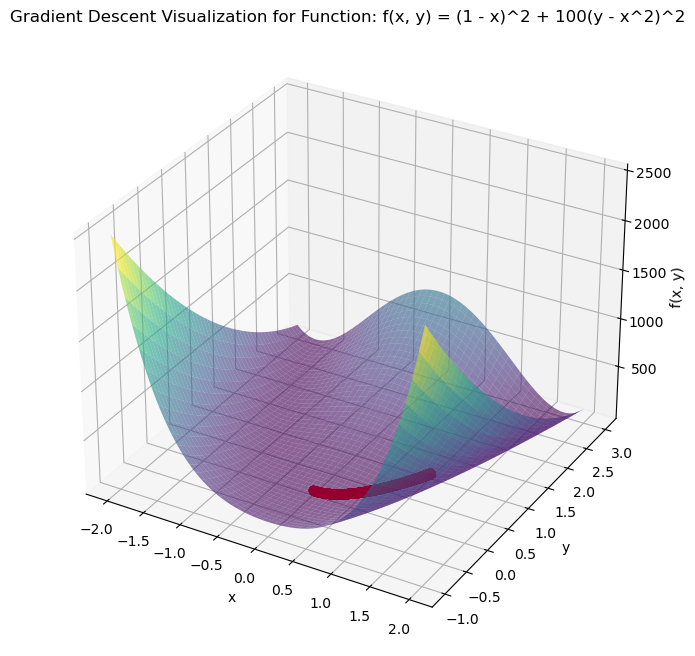

In [12]:
# defining the objective function
def quadfunction(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

def df_dy(x, y):
    return 200 * (y - x**2)

# gradient descent algorithm for two variables
def dim2_gradient_descent(x_initial, y_initial, learning_rate, epsilon):
    x_current, y_current = x_initial, y_initial
    x_history, y_history = [x_current], [y_current]
    while True:
        x_new = x_current - learning_rate * df_dx(x_current, y_current)
        y_new = y_current - learning_rate * df_dy(x_current, y_current)
        if abs(x_new - x_current) < epsilon and abs(y_new - y_current) < epsilon:
            break
        x_current, y_current = x_new, y_new
        x_history.append(x_current)
        y_history.append(y_current)
    return x_current, y_current, len(x_history), x_history, y_history

# initial guesses for optimization
initial_x_guess = 0
initial_y_guess = 0

# learning rate for gradient descent
learning_rate = 0.001

# convergence rate
epsilon = 1e-6

# initailizin gradient descent algorithm
min_x, min_y, num_iterations, x_points_visited, y_points_visited = dim2_gradient_descent(initial_x_guess, initial_y_guess, learning_rate, epsilon)

print(f"The algorithm converged to the minimum point (x, y) = ({min_x}, {min_y}) in {num_iterations} iterations.")

# visualizing the optimization in 3D
x_grid = np.linspace(-2, 2, 400)
y_grid = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_grid, y_grid)
Z = quadfunction(X, Y)

#  3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plotting 3d surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# plotting the optimization path
ax.plot(x_points_visited, y_points_visited, quadfunction(np.array(x_points_visited), np.array(y_points_visited)), color='red', marker='o')

# Plot axes name
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent Visualization for Function: f(x, y) = (1 - x)^2 + 100(y - x^2)^2')
plt.show()
